In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

BASE_PATH = '/home/guillermo/Documents/SINC/RNA/analysis/AEseq2seq/'
DATA_PATH = 'notebooks/from_db/Unet/v1/'

In [62]:
sns.set_theme(style="whitegrid", palette="pastel")

In [ ]:
data_conv = pd.read_csv(BASE_PATH + DATA_PATH + 'convolutional_layers/params_best_epoch.csv')
metrics_conv = pd.read_csv(BASE_PATH + DATA_PATH + 'convolutional_layers/train_metrics.csv')

data_conv['compression1'] =   data_conv['arc_stride_1'] ** data_conv['arc_num_conv1']

data_conv['compression2'] = data_conv['compression1'] * data_conv['arc_stride_2'] ** data_conv['arc_num_conv2']

In [146]:
data_conv.columns

Index(['run_uuid', 'name', 'best_epoch', 'arc_filters', 'arc_rank',
       'arc_kernel', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1',
       'arc_num_conv2', 'arc_skip_conn', 'hyp_lr', 'hyp_output_th',
       'hyp_scheduler', 'best_epoch.1', 'train_loss', 'train_Accuracy',
       'train_Accuracy_seq', 'train_F1', 'valid_loss', 'valid_Accuracy',
       'valid_Accuracy_seq', 'valid_F1', 'test_loss', 'test_Accuracy',
       'test_Accuracy_seq', 'test_F1', 'compression1', 'compression2'],
      dtype='object')

In [147]:
data_conv[['name', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1', 'arc_num_conv2', 'compression1', 'compression2']].sample(2)

,name,arc_stride_1,arc_stride_2,arc_num_conv1,arc_num_conv2,compression1,compression2
6,UNet-no-skips-num_convs-1-2-stride-2-1,2,1,1,2,2,2
16,UNet-no-skips-num_convs-3-1-stride-1-1,1,1,3,1,1,1


In [ ]:
data_pool = pd.read_csv(BASE_PATH + DATA_PATH + 'pooling_layers/params_best_epoch.csv')
metrics_pool = pd.read_csv(BASE_PATH + DATA_PATH + 'pooling_layers/train_metrics.csv')

data_pool['compression1'] =   2 ** data_pool['arc_num_conv1']
data_pool['compression2'] =  data_pool['compression1'] * 2 ** data_pool['arc_num_conv2']
 
data_pool['name'] = data_pool['name'].apply(lambda x: x[x.index('num_convs'):])

data_conv['name'] = data_conv['name'].apply(lambda x: x[x.index('num_convs'):])

In [194]:
data_c_skips = data_conv[data_conv['arc_skip_conn'] == 1]
data_pool_skips = data_pool[data_pool['arc_skip_conn'] == 1]
data_c_no_skips = data_conv[data_conv['arc_skip_conn'] == 0]
data_pool_no_skips = data_pool[data_pool['arc_skip_conn'] == 0]

In [195]:
data_conv.columns

Index(['run_uuid', 'name', 'best_epoch', 'arc_filters', 'arc_rank',
       'arc_kernel', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1',
       'arc_num_conv2', 'arc_skip_conn', 'hyp_lr', 'hyp_output_th',
       'hyp_scheduler', 'best_epoch.1', 'train_loss', 'train_Accuracy',
       'train_Accuracy_seq', 'train_F1', 'valid_loss', 'valid_Accuracy',
       'valid_Accuracy_seq', 'valid_F1', 'test_loss', 'test_Accuracy',
       'test_Accuracy_seq', 'test_F1', 'compression1', 'compression2'],
      dtype='object')

In [196]:
data_conv[['name', 'arc_filters', 'arc_rank', 'arc_num_conv1','arc_num_conv2', 'arc_skip_conn', 'arc_stride_1','arc_stride_2', 'compression1', 'compression2', 'best_epoch','train_Accuracy', 'valid_Accuracy', 'test_Accuracy']].sort_values(['arc_rank', 'arc_skip_conn'])

,name,arc_filters,arc_rank,arc_num_conv1,arc_num_conv2,arc_skip_conn,arc_stride_1,arc_stride_2,compression1,compression2,best_epoch,train_Accuracy,valid_Accuracy,test_Accuracy
0,num_convs-1-1-stride-1-1,4,8,1,1,0,1,1,1,1,15,0.999686,0.999402,0.999259
1,num_convs-1-1-stride-1-2,4,8,1,1,0,1,2,1,2,15,0.999992,0.999990,1.000000
2,num_convs-1-1-stride-2-1,4,8,1,1,0,2,1,2,2,18,0.953864,0.951321,0.949370
3,num_convs-1-1-stride-2-2,4,8,1,1,0,2,2,2,4,18,0.949230,0.946668,0.942324
4,num_convs-1-2-stride-1-1,4,8,1,2,0,1,1,1,1,15,0.999987,1.000000,1.000000
5,num_convs-1-2-stride-1-2,4,8,1,2,0,1,2,1,4,17,0.999384,0.999591,0.999722
6,num_convs-1-2-stride-2-1,4,8,1,2,0,2,1,2,2,19,0.954568,0.953643,0.949311
7,num_convs-1-2-stride-2-2,4,8,1,2,0,2,2,2,8,19,0.908498,0.915258,0.904928
8,num_convs-2-1-stride-1-1,4,8,2,1,0,1,1,1,1,18,0.999758,0.999811,0.999832
9,num_convs-2-1-stride-1-2,4,8,2,1,0,1,2,1,2,19,0.999961,1.000000,1.000000


In [197]:
data_pool[['run_uuid','name', 'arc_filters', 'arc_rank',  'arc_num_conv1','arc_num_conv2', 'arc_stride_1', 'arc_stride_2', 'arc_skip_conn', 'best_epoch','train_Accuracy', 'valid_Accuracy', 'test_Accuracy']].sort_values(['name','arc_rank', 'arc_skip_conn']).query('best_epoch >2')

,run_uuid,name,arc_filters,arc_rank,arc_num_conv1,arc_num_conv2,arc_stride_1,arc_stride_2,arc_skip_conn,best_epoch,train_Accuracy,valid_Accuracy,test_Accuracy
0,19ab1fbf9b9c49ff807bdd11aa079970,num_convs-1-1,4,8,1,1,1,1,0,16,0.998261,0.996642,0.994174
9,bbcc37b3eb3849109ae3aa31bf9277e2,num_convs-1-1,4,8,1,1,1,1,1,19,0.999923,1.000000,0.999958
1,6501a92df42847d38da59e8fe51ea6cf,num_convs-1-2,4,8,1,2,1,1,0,18,0.996566,0.993762,0.994292
10,e336376030534b83b7465a5ea28d9f6e,num_convs-1-2,4,8,1,2,1,1,1,17,0.998448,0.998575,0.998619
2,ec3e0e7702d44efa9ee1d597cb19915f,num_convs-1-3,4,8,1,3,1,1,0,19,0.991569,0.991998,0.993063
11,2ca9d7ab26c84e28851f96bd9501ff02,num_convs-1-3,4,8,1,3,1,1,1,19,0.999253,0.998625,0.999217
3,b9cabf0294f34b10b78ee2482de7d6a5,num_convs-2-1,4,8,2,1,1,1,0,17,0.998099,0.996193,0.995698
12,d1d71748673e4ec0bc43234c19006db3,num_convs-2-1,4,8,2,1,1,1,1,17,0.991752,0.991659,0.992861
4,2b1df7074d5c46b28d8406d0ea202278,num_convs-2-2,4,8,2,2,1,1,0,19,0.986000,0.974271,0.975434
13,24252fd7fbe343f38a415673c16cd4a9,num_convs-2-2,4,8,2,2,1,1,1,19,0.999610,0.999183,0.999217


# conv analysis


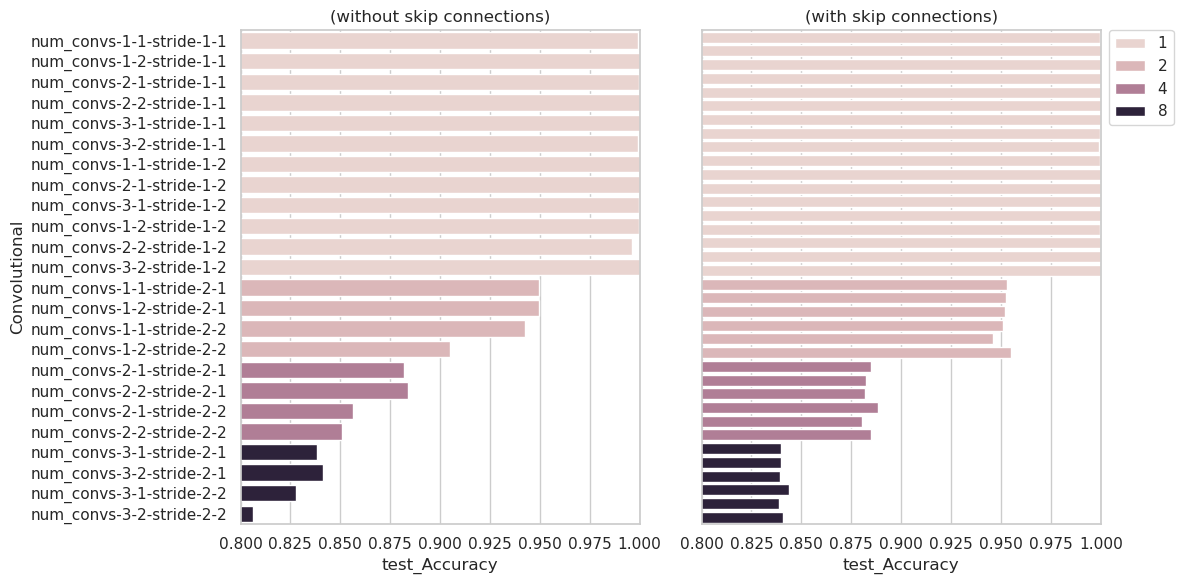

In [198]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
order = ['compression1','compression2']

g = sns.barplot(data=data_c_no_skips.sort_values(by=order), x='test_Accuracy', y='name', hue='compression1',legend=False,  ax=axes[0])
g.set_title('(without skip connections)') 
g.set_xlim([0.8, 1])

g.set(ylabel='Convolutional')

g = sns.barplot(data=data_c_skips.sort_values(by=order), x='test_Accuracy', y='name', hue='compression1', ax=axes[1])
g.set_title('(with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])
g.set_yticklabels([])
g.set(ylabel='')
fig.tight_layout()

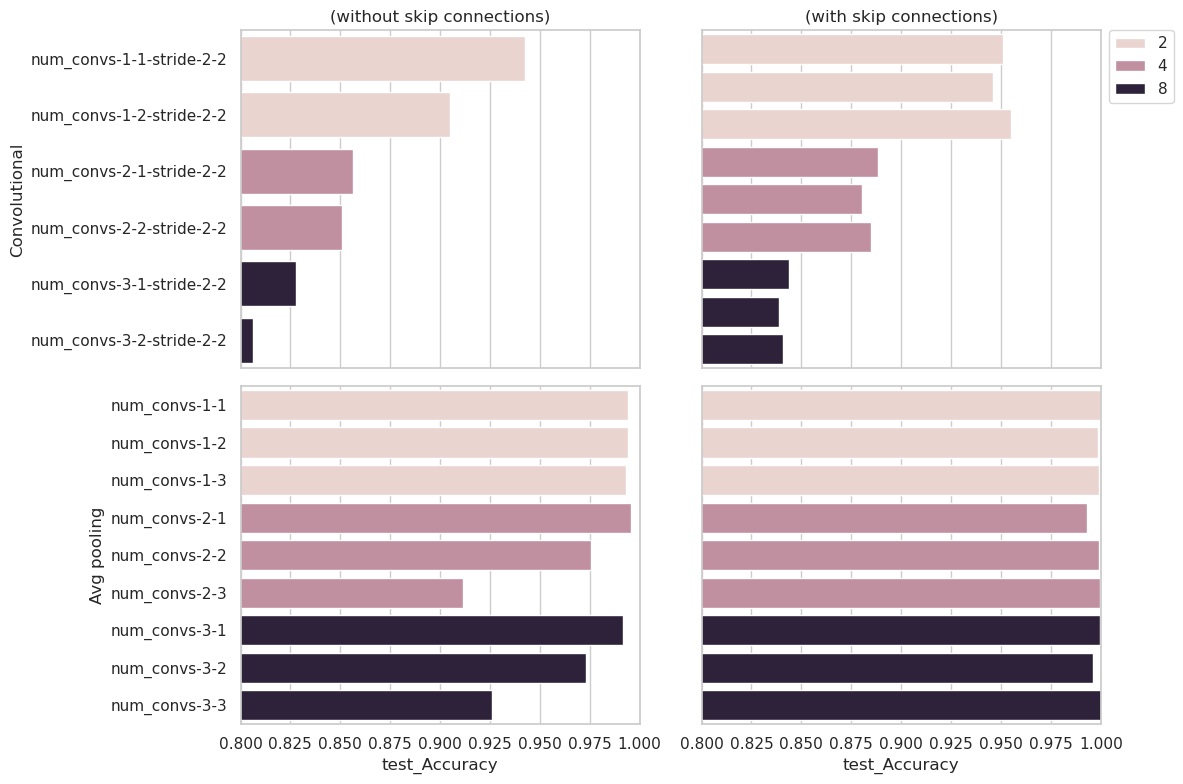

In [207]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
order = ['compression1','compression2']

g = sns.barplot(data=data_c_no_skips.query('arc_stride_1 == 2 &arc_stride_2 == 2').sort_values(by=order), x='test_Accuracy', y='name', hue='compression1',legend=False,  ax=axes[0, 0])
g.set_title('(without skip connections)') 
g.set_xlim([0.8, 1])

g.set(ylabel='Convolutional')

g = sns.barplot(data=data_c_skips.query('arc_stride_1 == 2 &arc_stride_2 == 2').sort_values(by=order), x='test_Accuracy', y='name', hue='compression1', ax=axes[0, 1])
g.set_title('(with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])
g.set_yticklabels([])
g.set(ylabel='')

order = ['compression1','compression2']
g = sns.barplot(data=data_pool_no_skips.sort_values(by=order), x='test_Accuracy', y='name', hue='compression1', legend=False, ax=axes[1, 0])
g.set_xlim([0.8, 1])
g.set(ylabel='Avg pooling')

g = sns.barplot(data=data_pool_skips.sort_values(by=order), x='test_Accuracy', y='name', hue='compression1', legend=False,  ax=axes[1, 1])
g.set_yticklabels([])
g.set(ylabel='')

g.set_xlim([0.8, 1])
fig.tight_layout()

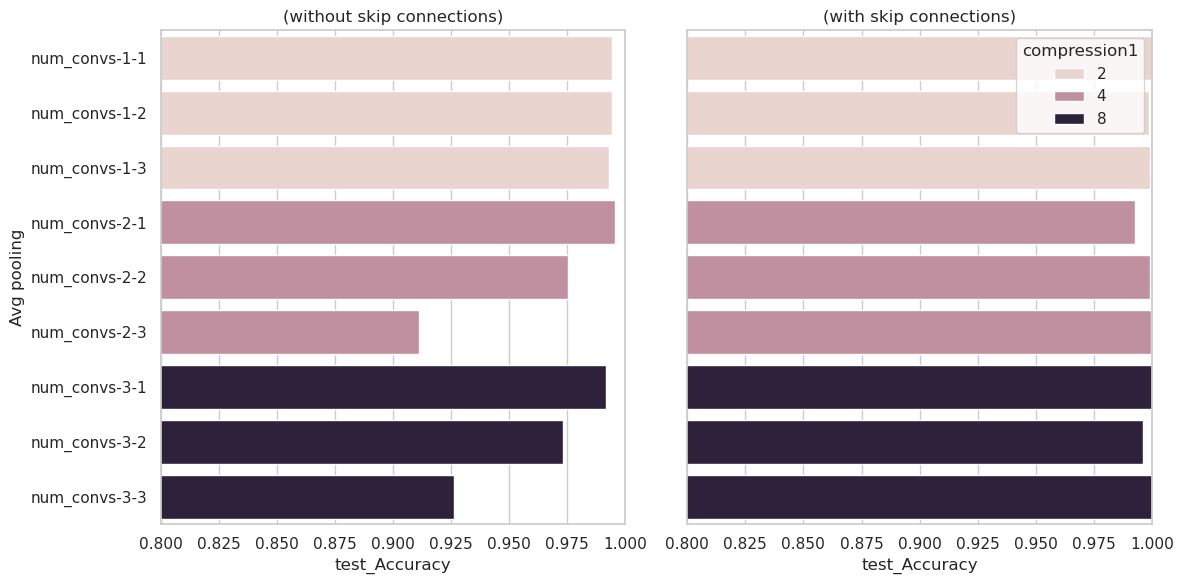

In [226]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
order = ['compression1','compression2']
g = sns.barplot(data=data_pool_no_skips.sort_values(by=order), x='test_Accuracy', y='name', hue='compression1', legend=False, ax=axes[0])

g.set_title('(without skip connections)')
g.set_xlim([0.8, 1])
g.set(ylabel='Avg pooling')

g = sns.barplot(data=data_pool_skips.sort_values(by=order), x='test_Accuracy', y='name', hue='compression1',  ax=axes[1])

g.set_title('(with skip connections)')
g.set_yticklabels([])
g.set(ylabel='')

g.set_xlim([0.8, 1])
fig.tight_layout()

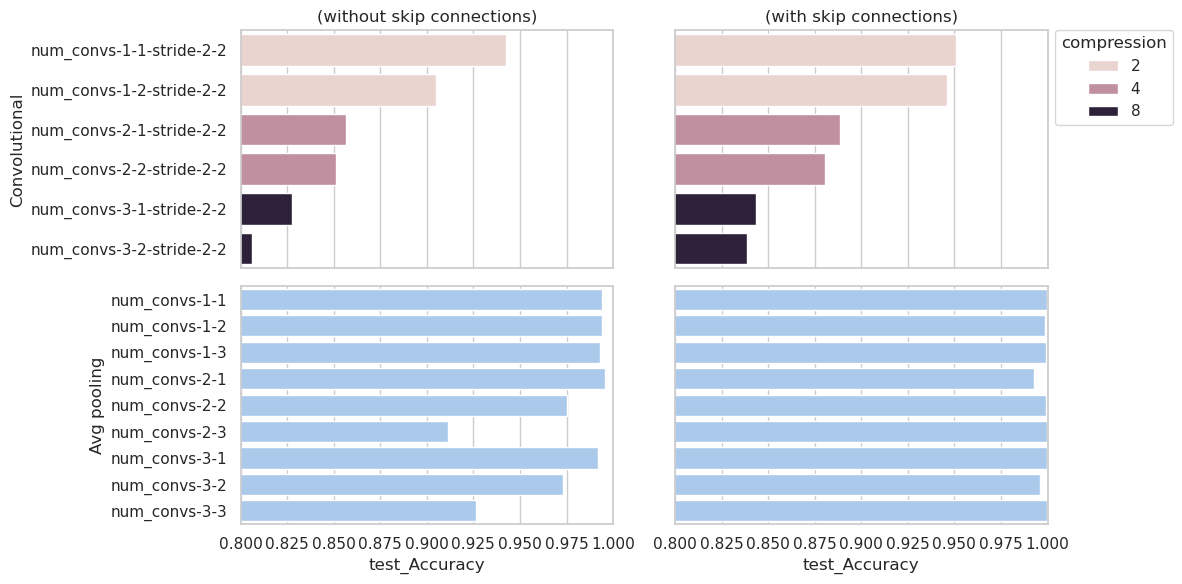

In [190]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True)

order = ['compression1','compression2']
g = sns.barplot(data=data_c_no_skips.query('arc_stride_1 == 2 & arc_stride_2 == 2').sort_values(by=order), x='test_Accuracy', y='name', hue='compression1',legend=False,  ax=axes[0, 0])
g.set_title('(without skip connections)') 
g.set_xlim([0.8, 1])

g.set(ylabel='Convolutional')

g = sns.barplot(data=data_c_skips.query('arc_stride_1 == 2 & arc_stride_2 == 2& arc_num_conv2 != 3').sort_values(by=order), x='test_Accuracy', y='name', hue='compression1', ax=axes[0, 1])
g.set_title('(with skip connections)')
g.legend(title='compression' ,bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])
g.set_yticklabels([])
g.set(ylabel='')


order = ['arc_num_conv1','arc_num_conv2']
g = sns.barplot(data=data_pool_no_skips.sort_values(by=order), x='test_Accuracy', y='name', hue='compression1', legend=False, ax=axes[1, 0])
g.set_xlim([0.8, 1])
g.set(ylabel='Avg pooling')

g = sns.barplot(data=data_pool_skips.sort_values(by=order), x='test_Accuracy', y='name', hue='compression1', legend=False,  ax=axes[1, 1])
g.set_yticklabels([])
g.set(ylabel='')

g.set_xlim([0.8, 1])
fig.tight_layout()

(0.8, 1.0)

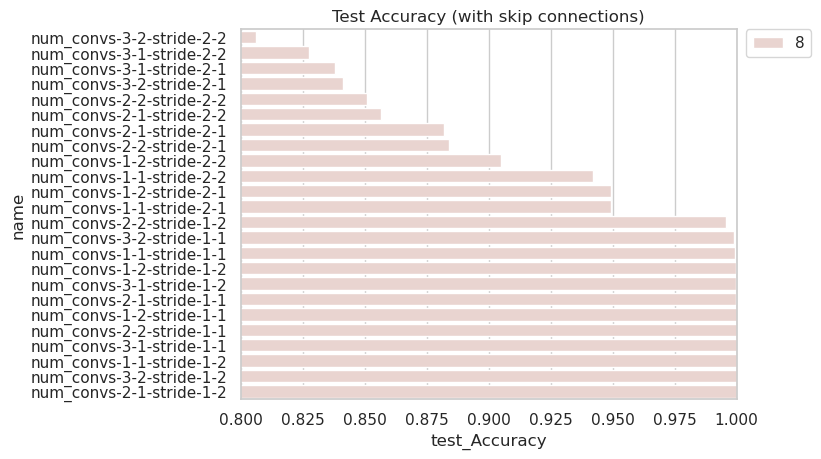

In [155]:
g = sns.barplot(data=data_c_no_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_rank')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])

(0.8, 1.0)

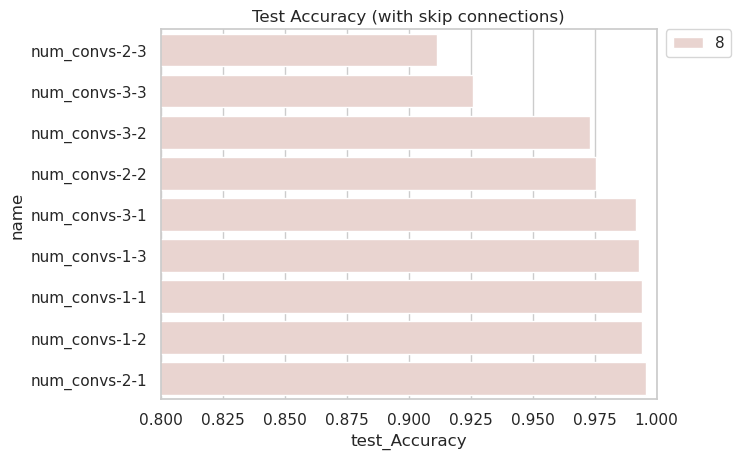

In [156]:
g = sns.barplot(data=data_pool_no_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_rank')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])

(0.8, 1.0)

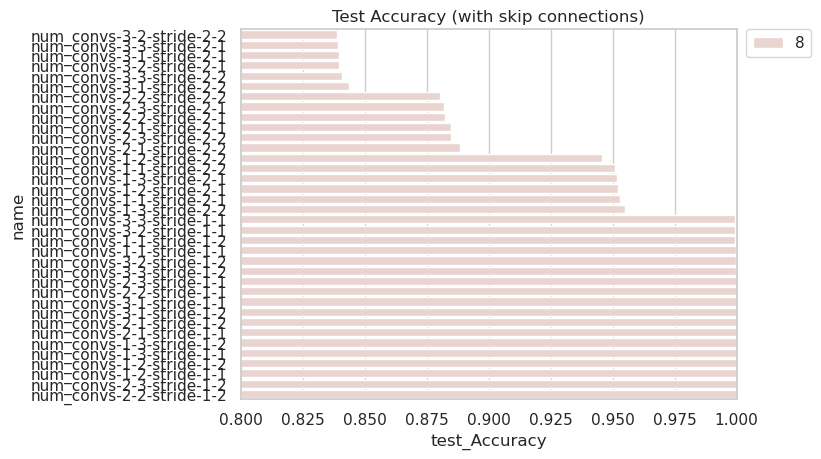

In [157]:
g = sns.barplot(data=data_c_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_rank')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])

(0.8, 1.0)

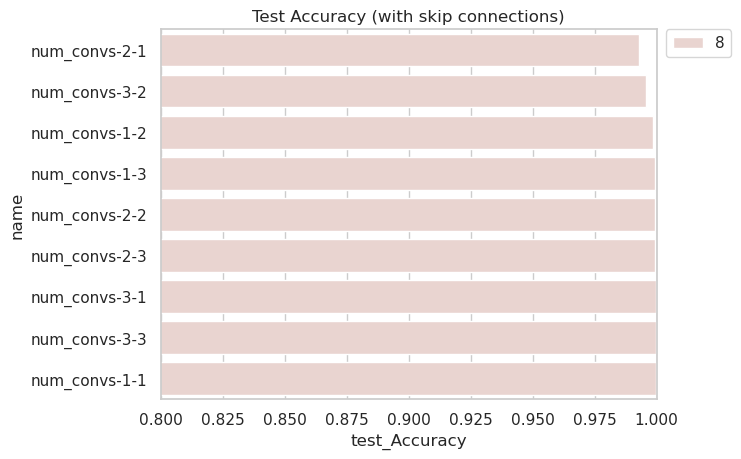

In [158]:
g = sns.barplot(data=data_pool_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_rank')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])

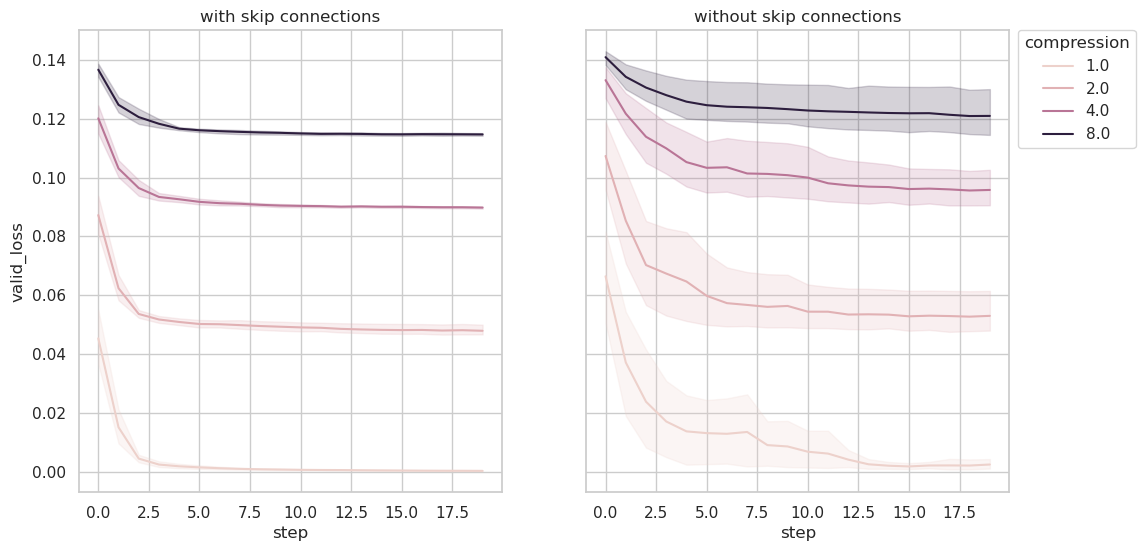

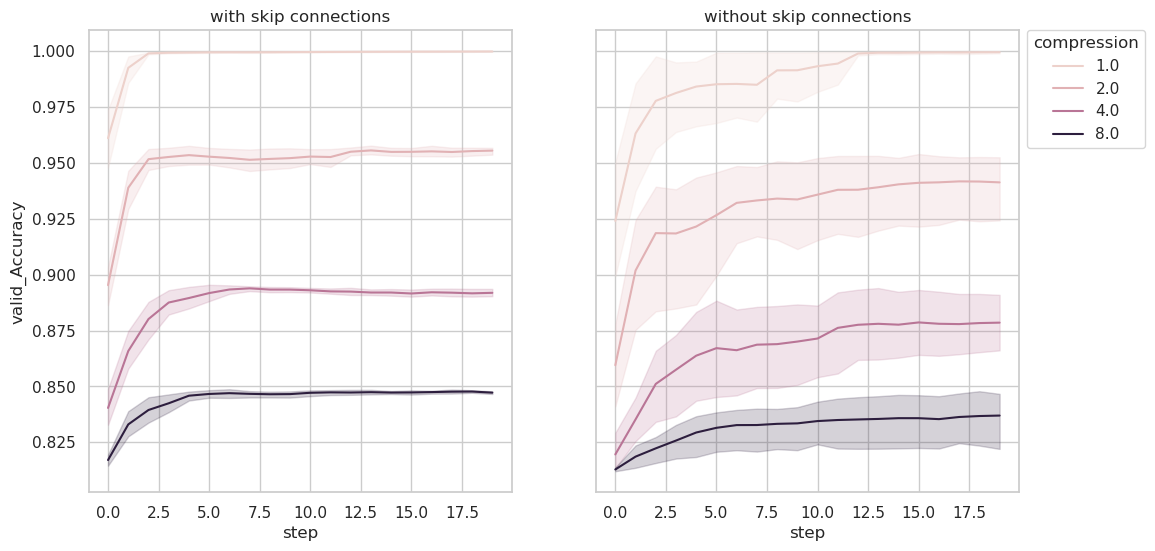

In [162]:
cols = ['run_uuid', 'arc_filters', 'arc_rank', 'arc_num_conv1','arc_num_conv2', 'arc_skip_conn',  'compression1', 'compression2']
metrics_skips = pd.merge(metrics_conv, data_c_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')
metrics_no_skips = pd.merge(metrics_conv, data_c_no_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_skips, x='step', y='valid_loss', hue='compression1', ax=ax[0], legend=False)
# g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_loss',  hue='compression1', ax=ax[1])
f.legend(title='compression', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# f.grid()
f.set_title('without skip connections')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_skips, x='step', y='valid_Accuracy',  hue='compression1', ax=ax[0], legend=False)
# g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy', hue='compression1', ax=ax[1])
f.legend(title='compression', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# f.grid()
f.set_title('without skip connections')

plt.show()

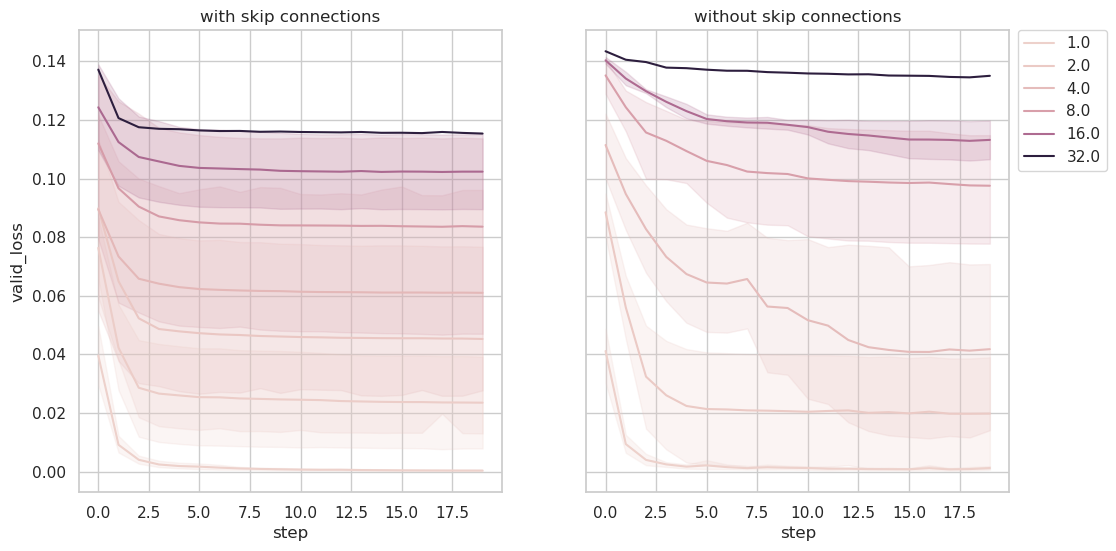

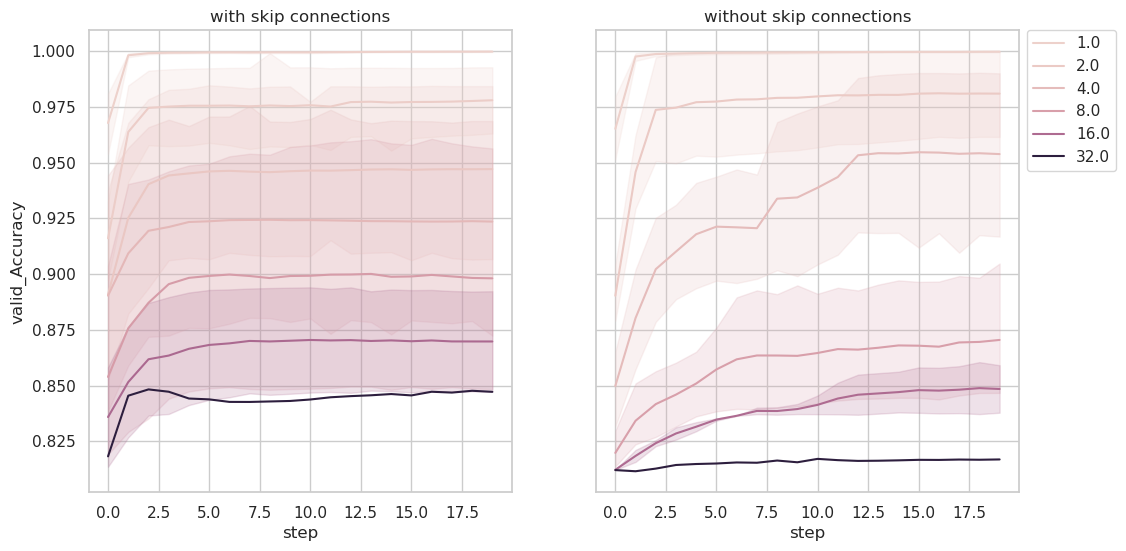

In [160]:
cols = ['run_uuid', 'arc_filters', 'arc_rank', 'arc_num_conv1','arc_num_conv2', 'arc_skip_conn',  'compression1', 'compression2']
metrics_skips = pd.merge(metrics_conv, data_c_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')
metrics_no_skips = pd.merge(metrics_conv, data_c_no_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_skips, x='step', y='valid_loss', hue='compression2', ax=ax[0], legend=False)
# g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_loss',  hue='compression2', ax=ax[1])
f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# f.grid()
f.set_title('without skip connections')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_skips, x='step', y='valid_Accuracy',  hue='compression2', ax=ax[0], legend=False)
# g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy', hue='compression2', ax=ax[1])
f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# f.grid()
f.set_title('without skip connections')

plt.show()

In [188]:

metrics_skips = pd.merge(metrics_pool, data_pool_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')
metrics_no_skips = pd.merge(metrics_pool, data_pool_no_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')


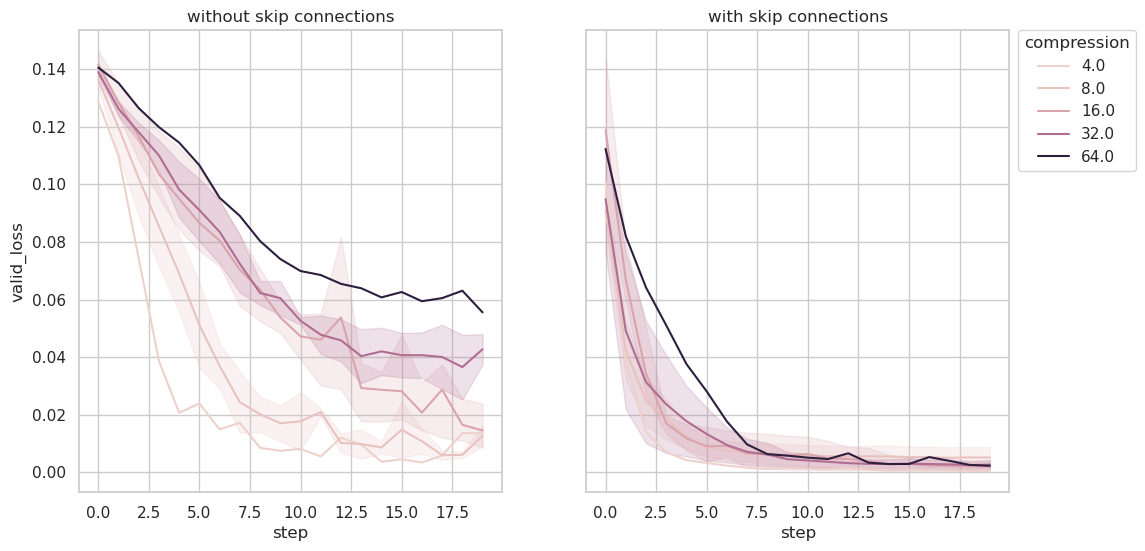

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


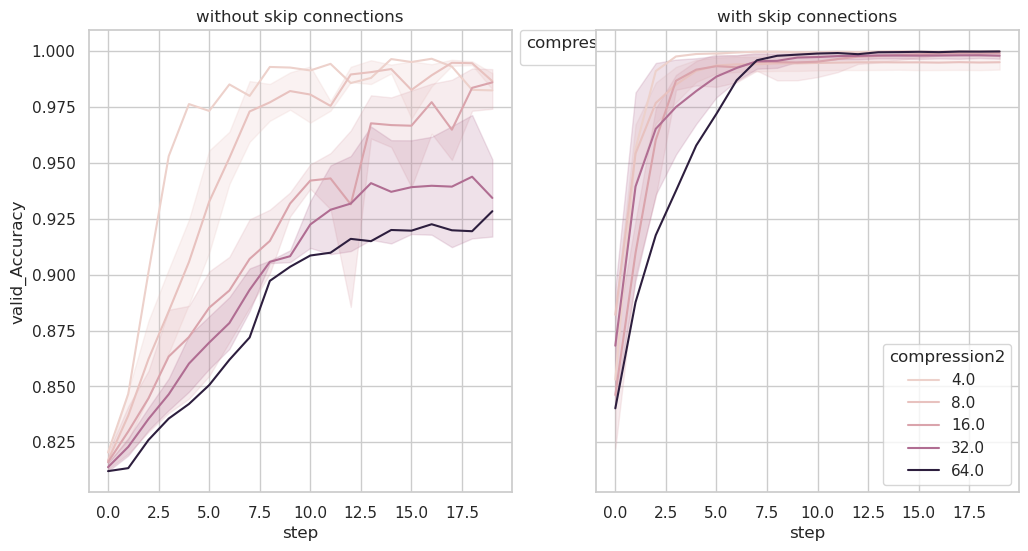

In [217]:
cols = ['run_uuid', 'arc_filters', 'arc_rank', 'arc_num_conv1','arc_num_conv2', 'arc_skip_conn',  'compression1', 'compression2']

metrics_skips = pd.merge(metrics_pool, data_pool_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')
metrics_no_skips = pd.merge(metrics_pool, data_pool_no_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
hue = 'compression2'
g = sns.lineplot(data=metrics_skips, x='step', y='valid_loss', hue=hue, ax=ax[1])
g.legend(title='compression', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_loss',  hue=hue, ax=ax[0], legend=False)
# f.grid()
f.set_title('without skip connections')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_skips, x='step', y='valid_Accuracy',  hue=hue, ax=ax[1])
# g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy', hue=hue, ax=ax[0], legend=False)
f.legend(title='compression', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# f.grid()
f.set_title('without skip connections')

plt.show()

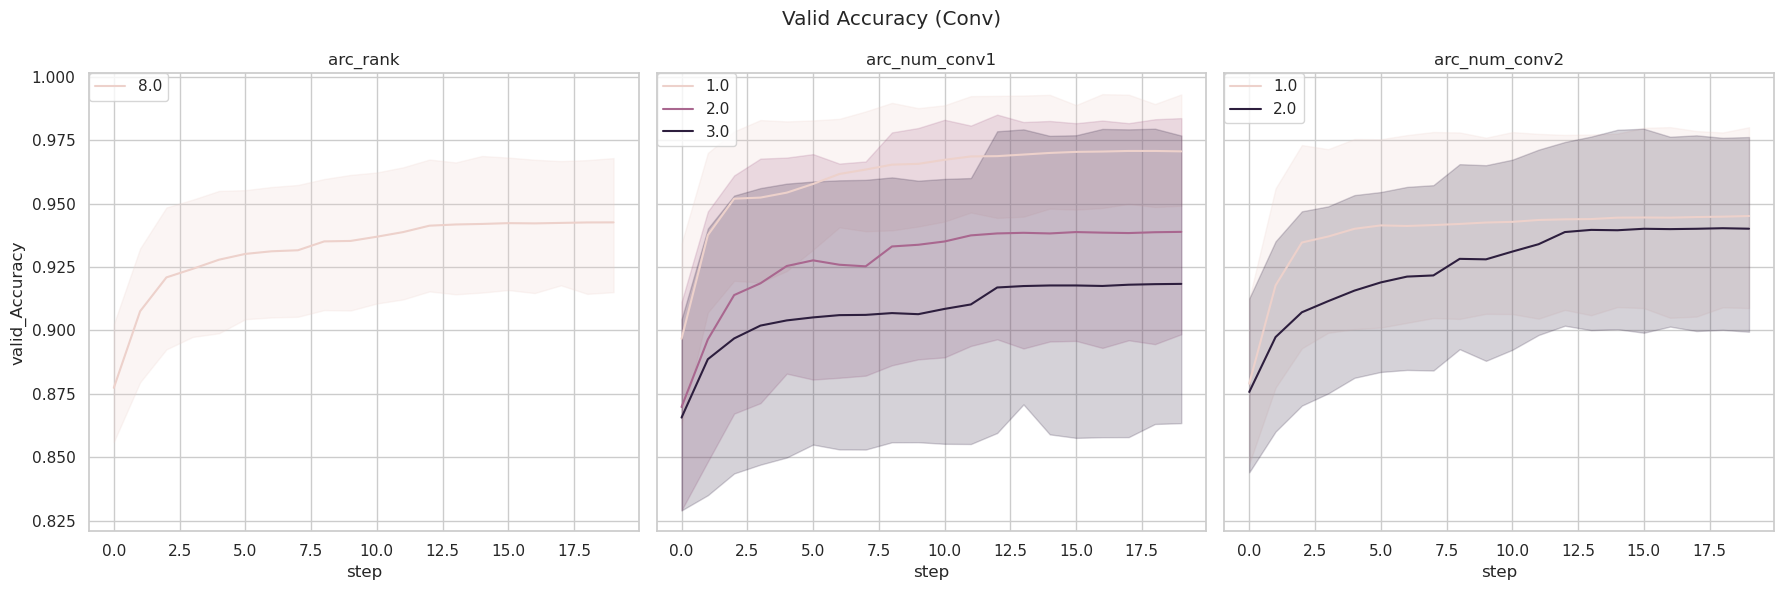

In [225]:
cols = ['run_uuid', 'arc_filters', 'arc_rank', 'arc_num_conv1','arc_num_conv2', 'compression1','compression2', 'arc_skip_conn']
metrics_skips = pd.merge(metrics_conv, data_c_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')
metrics_no_skips = pd.merge(metrics_conv, data_c_no_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy',   hue='arc_rank', ax=ax[0] )

g.legend(loc='upper left', borderaxespad=0.)
g.set_title('arc_rank')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy',   hue='arc_num_conv1', ax=ax[1])
f.legend(loc='upper left', borderaxespad=0.)
f.set_title('arc_num_conv1')


f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy',   hue='arc_num_conv2', ax=ax[2])
f.set_title('arc_num_conv2')
f.legend(loc='upper left', borderaxespad=0.)

fig.suptitle('Valid Accuracy (Conv)')
fig.tight_layout()
